In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_train = pd.read_csv('./DataSet/train.csv',sep=',')
df_test  = pd.read_csv('./DataSet/test.csv', sep=',')

In [5]:
df_train.head()
y_train = pd.DataFrame()
y_train['SalePrice'] = df_train['SalePrice']

# Missing Values - variáveis categórica

In [6]:
train_cols_with_missing = [col for col in df_train.columns if df_train[col].isnull().any()]
train_cols_with_missing

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Alley - Tipo de acesso do beco à propriedade

In [7]:
df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

<AxesSubplot:xlabel='Alley'>

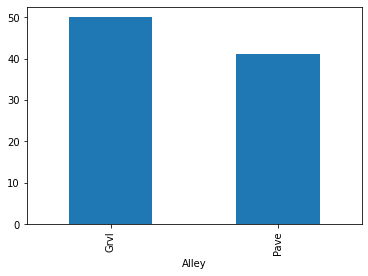

In [8]:
#df_train['Alley'] = df_train['Alley'].fillna(value='NaN')
group = df_train.groupby('Alley')
group.count()['SalePrice'].plot.bar()

In [9]:
vet = group.count()['SalePrice']/df_train[df_train['Alley'].notnull()]['SalePrice'].count()

In [10]:
vet = vet.to_frame()
vet.reset_index()

,Alley,SalePrice
0,Grvl,0.549451
1,Pave,0.450549


In [11]:
df_train['Alley'] = df_train['Alley'].fillna(value='NaN')

In [12]:
# Grvl
dist_change = df_train[df_train['Alley']=='NaN']['Id'].sample(frac=0.549451)
for id in dist_change:
    df_train.loc[df_train["Id"]==id, "Alley"] = 'Grvl'

In [13]:
# Pave
dist_change = df_train[df_train['Alley']=='NaN']['Id'].sample(frac=1)
for id in dist_change:
    df_train.loc[df_train["Id"]==id, "Alley"] = 'Pave'

In [14]:
df_train['Alley'].value_counts()

Grvl    802
Pave    658
Name: Alley, dtype: int64

<AxesSubplot:xlabel='MasVnrType'>

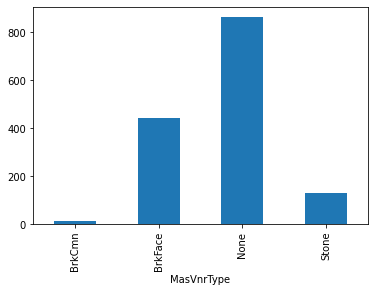

In [15]:
#df_train['Alley'] = df_train['Alley'].fillna(value='NaN')
group = df_train.groupby('MasVnrType')
group.count()['SalePrice'].plot.bar()

In [16]:
df_train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [17]:
vet = group.count()['SalePrice']/df_train[df_train['MasVnrType'].notnull()]['SalePrice'].count()
vet = vet.to_frame()
vet.reset_index()

,MasVnrType,SalePrice
0,BrkCmn,0.010331
1,BrkFace,0.306474
2,None,0.595041
3,Stone,0.088154


In [18]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(value='NaN')
dist_change = df_train[df_train['MasVnrType']=='NaN']['Id'].sample(frac=1)
for id in dist_change:
    df_train.loc[df_train["Id"]==id, "MasVnrType"] = 'None'

In [19]:
df_train['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Criando campo data no conjundo de dados para treino

In [20]:
df_train['year'] = df_train['YrSold']
df_train['month'] = df_train['MoSold']
df_train['day'] = 1
df_train['DateSold'] = pd.to_datetime(df_train[['year','month','day']])

del df_train['year']
del df_train['month']
del df_train['day']

Criando campo data no conjundo de dados para teste

In [21]:
df_test['year'] = df_test['YrSold']
df_test['month'] = df_test['MoSold']
df_test['day'] = 1
df_test['DateSold'] = pd.to_datetime(df_test[['year','month','day']])

del df_test['year']
del df_test['month']
del df_test['day']

In [22]:
cat_features = df_train.columns
drop_not_cat_features = ['Id','LotArea','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal','MoSold','YrSold','YearBuilt','YearRemodAdd','PoolArea','SalePrice','DateSold']
cat_features = cat_features.drop(drop_not_cat_features)
cat_features=cat_features.tolist()
#cat_features

In [23]:
df_train[cat_features] = df_train[cat_features].fillna(value='NaN')
df_test[cat_features] = df_test[cat_features].fillna(value='NaN')

In [24]:
df_train[drop_not_cat_features].describe()

,Id,LotArea,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,YearBuilt,YearRemodAdd,PoolArea,SalePrice
count,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,70.049958,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,...,21.954110,3.409589,15.060959,43.489041,6.321918,2007.815753,1971.267808,1984.865753,2.758904,180921.195890
std,421.610009,9981.264932,24.284752,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,...,61.119149,29.317331,55.757415,496.123024,2.703626,1.328095,30.202904,20.645407,40.177307,79442.502883
min,1.000000,1300.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1872.000000,1950.000000,0.000000,34900.000000
25%,365.750000,7553.500000,59.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,1954.000000,1967.000000,0.000000,129975.000000
50%,730.500000,9478.500000,69.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,1973.000000,1994.000000,0.000000,163000.000000
75%,1095.250000,11601.500000,80.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,2000.000000,2004.000000,0.000000,214000.000000
max,1460.000000,215245.000000,313.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,...,552.000000,508.000000,480.000000,15500.000000,12.000000,2010.000000,2010.000000,2010.000000,738.000000,755000.000000


## Tratando outlines no target

In [25]:
# target
df_train['SalePrice'] = np.log(df_train['SalePrice'] + 1)


# Baseline Model

In [26]:
def get_data_splits(dataframe, valid_fraction=0.1):
    dataframe = dataframe.sort_values('DateSold')
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

## 1) CastBoost Encoding

In [27]:
train, valid, test = get_data_splits(df_train)

In [29]:
import category_encoders as ce
cb_enc = ce.CatBoostEncoder(cols=cat_features)

# Create the CatBoost encoder
cb_enc.fit(train[cat_features], train['SalePrice'])

# Apply encoding to the train and validation sets as new columns
# Make sure to add `_cb` as a suffix to the new columns
train_encoded = train.join(cb_enc.transform(train[cat_features]).add_suffix('_cb'))
valid_encoded = valid.join(cb_enc.transform(valid[cat_features]).add_suffix('_cb'))
test_encoded  = test.join(cb_enc.transform(test[cat_features]).add_suffix('_cb'))

In [30]:
train_encoded = train_encoded.drop(cat_features, axis=1)
valid_encoded = valid_encoded.drop(cat_features, axis=1)
test_encoded  = test_encoded.drop(cat_features, axis=1)

In [31]:
train_encoded = train_encoded.drop(['MoSold','YrSold','DateSold'], axis=1)
valid_encoded = valid_encoded.drop(['MoSold','YrSold','DateSold'], axis=1)
test_encoded  = test_encoded.drop(['MoSold','YrSold','DateSold'], axis=1)

## Missing Values

In [32]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()

imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_encoded))
imputed_X_valid = pd.DataFrame(my_imputer.fit_transform(valid_encoded))
imputed_X_test  = pd.DataFrame(my_imputer.fit_transform(test_encoded))

imputed_X_train.columns = train_encoded.columns
imputed_X_valid.columns = valid_encoded.columns
imputed_X_test.columns  = test_encoded.columns


### Train with LightGBM

In [34]:
import lightgbm as lgb

feature_cols = imputed_X_train.columns.drop(['Id','SalePrice'])

dtrain = lgb.Dataset(imputed_X_train[feature_cols], label=train['SalePrice'])
dvalid = lgb.Dataset(imputed_X_valid[feature_cols], label=valid['SalePrice'])
dtest  = lgb.Dataset(imputed_X_test[feature_cols],  label=test['SalePrice'])

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

bst = lgb.train(params, dtrain, num_boost_round=1000, valid_sets=dvalid, early_stopping_rounds=100)

c:\apps\python\python37\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's l2: 0.151364	valid_0's l1: 0.310095
Training until validation scores don't improve for 100 rounds
[2]	valid_0's l2: 0.141603	valid_0's l1: 0.298888
[3]	valid_0's l2: 0.131635	valid_0's l1: 0.2867
[4]	valid_0's l2: 0.122854	valid_0's l1: 0.276201
[5]	valid_0's l2: 0.115088	valid_0's l1: 0.266601
[6]	valid_0's l2: 0.108385	valid_0's l1: 0.257764
[7]	valid_0's l2: 0.101731	valid_0's l1: 0.24847
[8]	valid_0's l2: 0.0952571	valid_0's l1: 0.239797
[9]	valid_0's l2: 0.0892972	valid_0's l1: 0.230978
[10]	valid_0's l2: 0.0842842	valid_0's l1: 0.223415
[11]	valid_0's l2: 0.0794355	valid_0's l1: 0.215424
[12]	valid_0's l2: 0.075433	valid_0's l1: 0.208639
[13]	valid_0's l2: 0.0716971	valid_0's l1: 0.202464
[14]	valid_0's l2: 0.0677741	valid_0's l1: 0.195724
[15]	valid_0's l2: 0.0643891	valid_0's l1: 0.18979
[16]	valid_0's

[176]	valid_0's l2: 0.0202998	valid_0's l1: 0.0895224
[177]	valid_0's l2: 0.020283	valid_0's l1: 0.0894714
[178]	valid_0's l2: 0.0203007	valid_0's l1: 0.0894246
[179]	valid_0's l2: 0.020283	valid_0's l1: 0.0893677
[180]	valid_0's l2: 0.0202536	valid_0's l1: 0.0893665
[181]	valid_0's l2: 0.0202348	valid_0's l1: 0.0892875
[182]	valid_0's l2: 0.020249	valid_0's l1: 0.0893772
[183]	valid_0's l2: 0.0202199	valid_0's l1: 0.0892767
[184]	valid_0's l2: 0.0202397	valid_0's l1: 0.0893584
[185]	valid_0's l2: 0.0202316	valid_0's l1: 0.08926
[186]	valid_0's l2: 0.020245	valid_0's l1: 0.0892462
[187]	valid_0's l2: 0.0202228	valid_0's l1: 0.0891349
[188]	valid_0's l2: 0.0202457	valid_0's l1: 0.0892063
[189]	valid_0's l2: 0.0202801	valid_0's l1: 0.0893844
[190]	valid_0's l2: 0.0202326	valid_0's l1: 0.0892442
[191]	valid_0's l2: 0.0202401	valid_0's l1: 0.0892152
[192]	valid_0's l2: 0.020294	valid_0's l1: 0.0892924
[193]	valid_0's l2: 0.0203113	valid_0's l1: 0.0892921
[194]	valid_0's l2: 0.020319	valid_

In [35]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

ypred = bst.predict(imputed_X_test[feature_cols], num_iteration=bst.best_iteration)
print('The rmse of prediction is:', mean_squared_error(test['SalePrice'], ypred) ** 0.5)

The rmse of prediction is: 0.1142491652140275


In [ ]:
##The rmse of prediction is: 23262.730666296848
##The rmse of prediction is: 23782.891028491173
##The rmse of prediction is: 23673.62007031281

## Create dataset for submission

In [36]:
test_encoded  = df_test.join(cb_enc.transform(df_test[cat_features]).add_suffix('_cb'))
test_encoded  = test_encoded.drop(cat_features, axis=1)
test_encoded  = test_encoded.drop(['MoSold','YrSold','DateSold'], axis=1)

In [37]:
imputed_X_test_sub  = pd.DataFrame(my_imputer.fit_transform(test_encoded))
imputed_X_test_sub.columns  = test_encoded.columns

In [38]:
feature_cols = imputed_X_test_sub.columns.drop('Id')
len(feature_cols)

77

In [39]:
ypred = bst.predict(imputed_X_test_sub[feature_cols], num_iteration=bst.best_iteration)

In [40]:
ypred = np.exp(ypred)

In [41]:
sub= pd.Series(ypred, index=imputed_X_test_sub['Id'].astype(np.int64), name='SalePrice')
sub.shape

(1459,)

In [42]:
sub.head()

Id
1461    122235.420652
1462    158700.589239
1463    184372.020315
1464    191616.529721
1465    186236.583656
Name: SalePrice, dtype: float64

In [43]:
sub.to_csv("submission.csv", header=True)